<a href="https://colab.research.google.com/github/Dayaj2003/road-data/blob/main/Roadwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Detectron2 (official installation)
!pip install -U torch torchvision torchaudio
!pip install git+https://github.com/facebookresearch/detectron2.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

data_path = "/content/drive/MyDrive/RoadWatch"
register_coco_instances(
    "roadwatch_train",
    {},
    f"{data_path}/annotations/instances_train.json",
    f"{data_path}/images"
)

# Verify
roadwatch_metadata = MetadataCatalog.get("roadwatch_train")
dataset_dicts = DatasetCatalog.get("roadwatch_train")


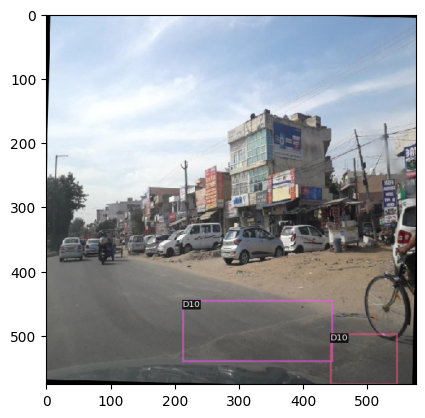

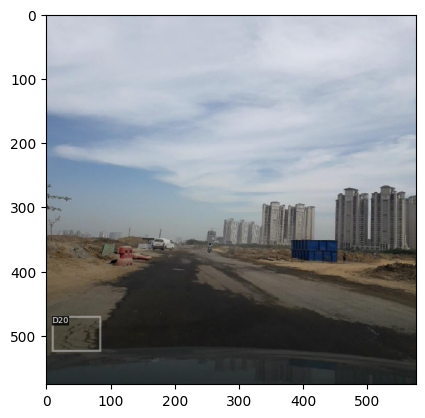

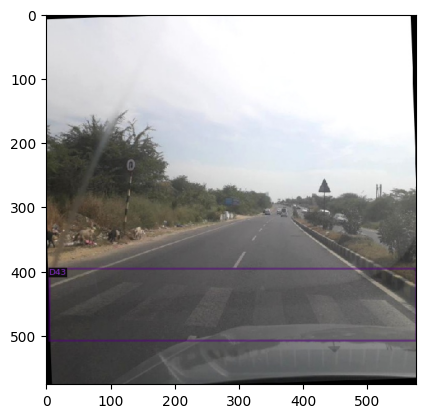

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, ::-1], metadata=roadwatch_metadata, scale=0.8)
    out = v.draw_dataset_dict(d)
    plt.imshow(out.get_image())
    plt.show()


In [ ]:
import os
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("roadwatch_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Pretrained weights
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.00025  # good starting point
cfg.SOLVER.MAX_ITER = 5000     # Adjust based on dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10  # update based on your dataset

cfg.OUTPUT_DIR = "/content/roadwatch_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)  # Now this will work

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/02 07:51:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:00, 243MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[06/02 07:51:33 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[06/02 07:51:54 d2.utils.events]:  eta: 1:10:58  iter: 19  total_loss: 2.761  loss_cls: 2.49  loss_box_reg: 0.009136  loss_rpn_cls: 0.2792  loss_rpn_loc: 0.0164    time: 0.8806  last_time: 0.7721  data_time: 0.3671  last_data_time: 0.2823   lr: 4.9953e-06  max_mem: 3067M
[06/02 07:52:23 d2.utils.events]:  eta: 1:10:41  iter: 39  total_loss: 2.605  loss_cls: 2.335  loss_box_reg: 0.0009864  loss_rpn_cls: 0.234  loss_rpn_loc: 0.01891    time: 0.9334  last_time: 0.8697  data_time: 0.4128  last_data_time: 0.2874   lr: 9.9902e-06  max_mem: 3067M
[06/02 07:52:41 d2.utils.events]:  eta: 1:11:05  iter: 59  total_loss: 2.195  loss_cls: 1.97  loss_box_reg: 0.004965  loss_rpn_cls: 0.2136  loss_rpn_loc: 0.01809    time: 0.9215  last_time: 0.7023  data_time: 0.3420  last_data_time: 0.1763   lr: 1.4985e-05  max_mem: 3067M
[06/02 07:53:00 d2.utils.events]:  eta: 1:10:29  iter: 79  total_loss: 1.758  loss_cls: 1.51  loss_box_reg: 0.00105  loss_rpn_cls: 0.2253  loss_rpn_loc: 0.01879    time: 0.9243  las

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("roadwatch_train", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "roadwatch_train")
inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [06/02 09:07:48 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/02 09:07:49 d2.data.datasets.coco]: Loaded 7984 images in COCO format from /content/drive/MyDrive/RoadWatch/annotations/instances_train.json
[06/02 09:07:49 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/02 09:07:49 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[06/02 09:07:49 d2.data.common]: Serializing 7984 elements to byte tensors and concatenating them all ...
[06/02 09:07:49 d2.data.common]: Serialized dataset takes 2.23 MiB
[06/02 09:07:49 d2.evaluation.evaluator]: Start inference on 7984 batches
[06/02 09:07:50 d2.evaluation.evaluator]: Inference done 11/7984. Dataloading: 0.0011 s/iter. Inference: 0.0761 s/iter. Eval: 0.0003 s/iter. 

OrderedDict([('bbox',
              {'AP': 15.100160761038575,
               'AP50': 37.020337507138606,
               'AP75': 9.323293639012046,
               'APs': 9.429412642407808,
               'APm': 14.305696916659727,
               'APl': 14.548290124557958,
               'AP-D00': 6.95139781447551,
               'AP-D01': 19.003623733273827,
               'AP-D10': 12.112612289521401,
               'AP-D11': 6.893108174875636,
               'AP-D20': 8.603463088542519,
               'AP-D40': 6.023811672404145,
               'AP-D43': 21.32781960484685,
               'AP-D44': 20.403011384862204,
               'AP-D50': 34.58259908654507,
               'AP-D0w0': nan})])

[06/02 09:30:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


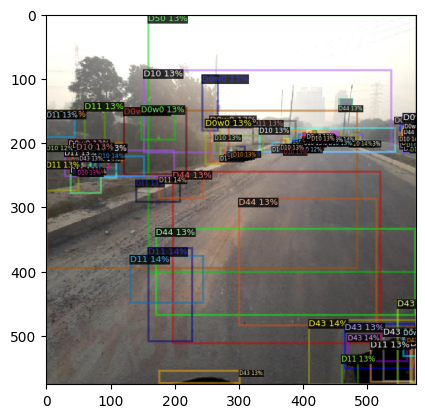

In [ ]:
from detectron2.engine import DefaultPredictor

predictor = DefaultPredictor(cfg)

image_path = "/content/drive/MyDrive/RoadWatch/India_001671.jpg"
im = cv2.imread(image_path)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], metadata=roadwatch_metadata, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())
plt.show()
